In [5]:
import os
os.chdir("/workspaces/BAIT")

import numpy as np
import pandas as pd
import torch
import seaborn as sns
from analysis.results_utils import load_csv

df = load_csv()
df = df.sort_values(by="final_sparsity")
len(df)

7100

# Compare accuracy for differnet algos (baselines)

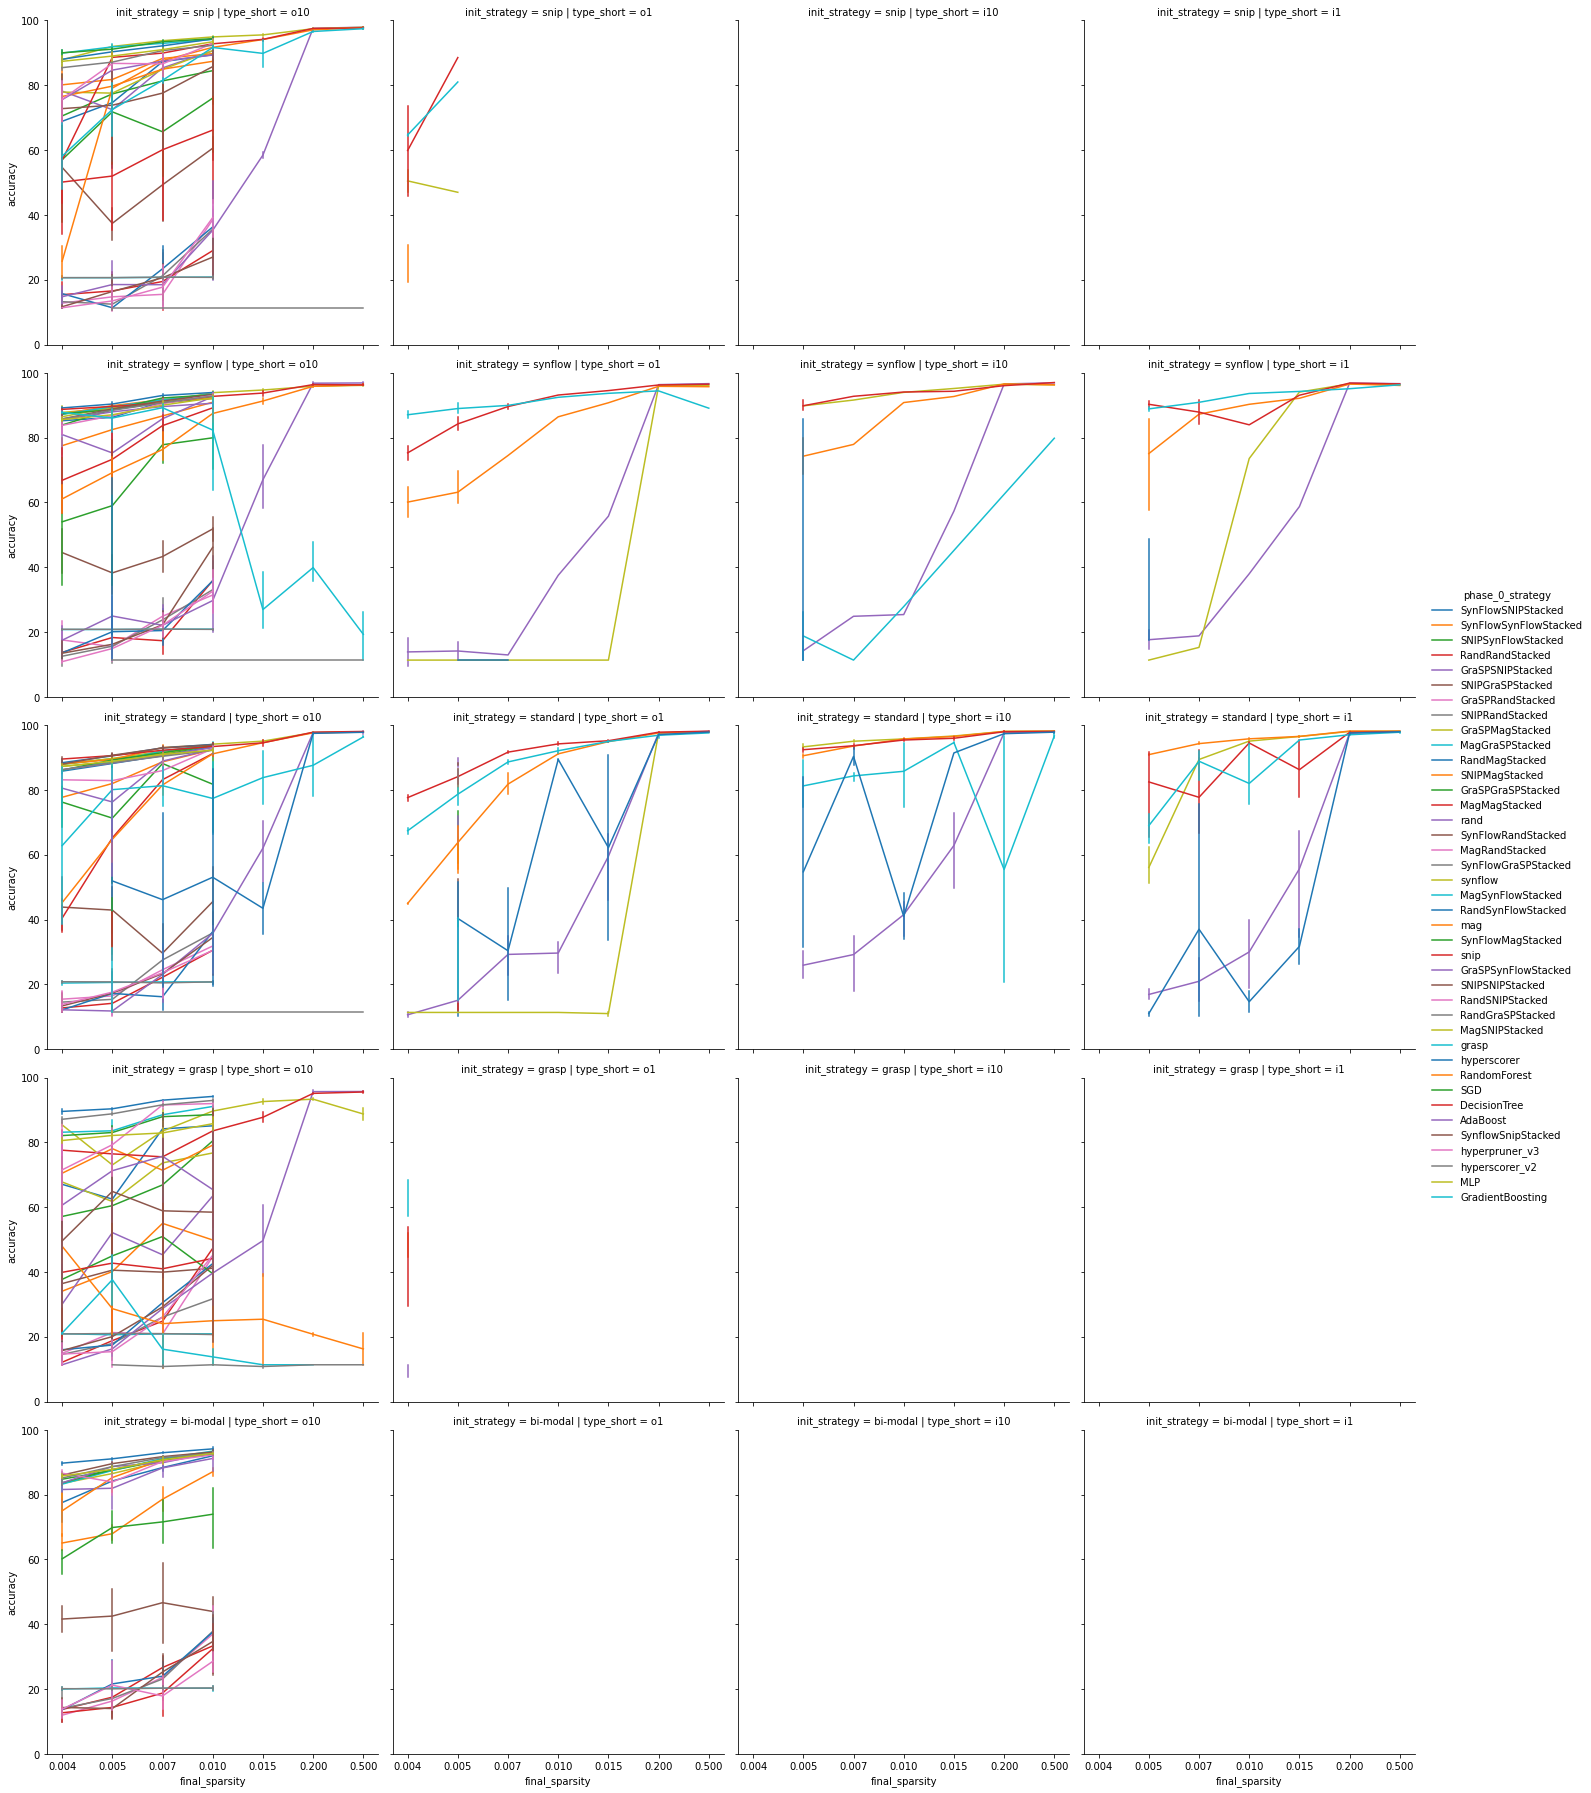

In [3]:
df["final_sparsity"] = df["final_sparsity"].apply(lambda x: f"{x:.3f}")
g = sns.relplot(data=df, x="final_sparsity", y="accuracy", row="init_strategy", col="type_short", hue="phase_0_strategy", err_style="bars", palette="tab10", kind="line")
g.set(ylim=(0, 100))

# compare init schemes

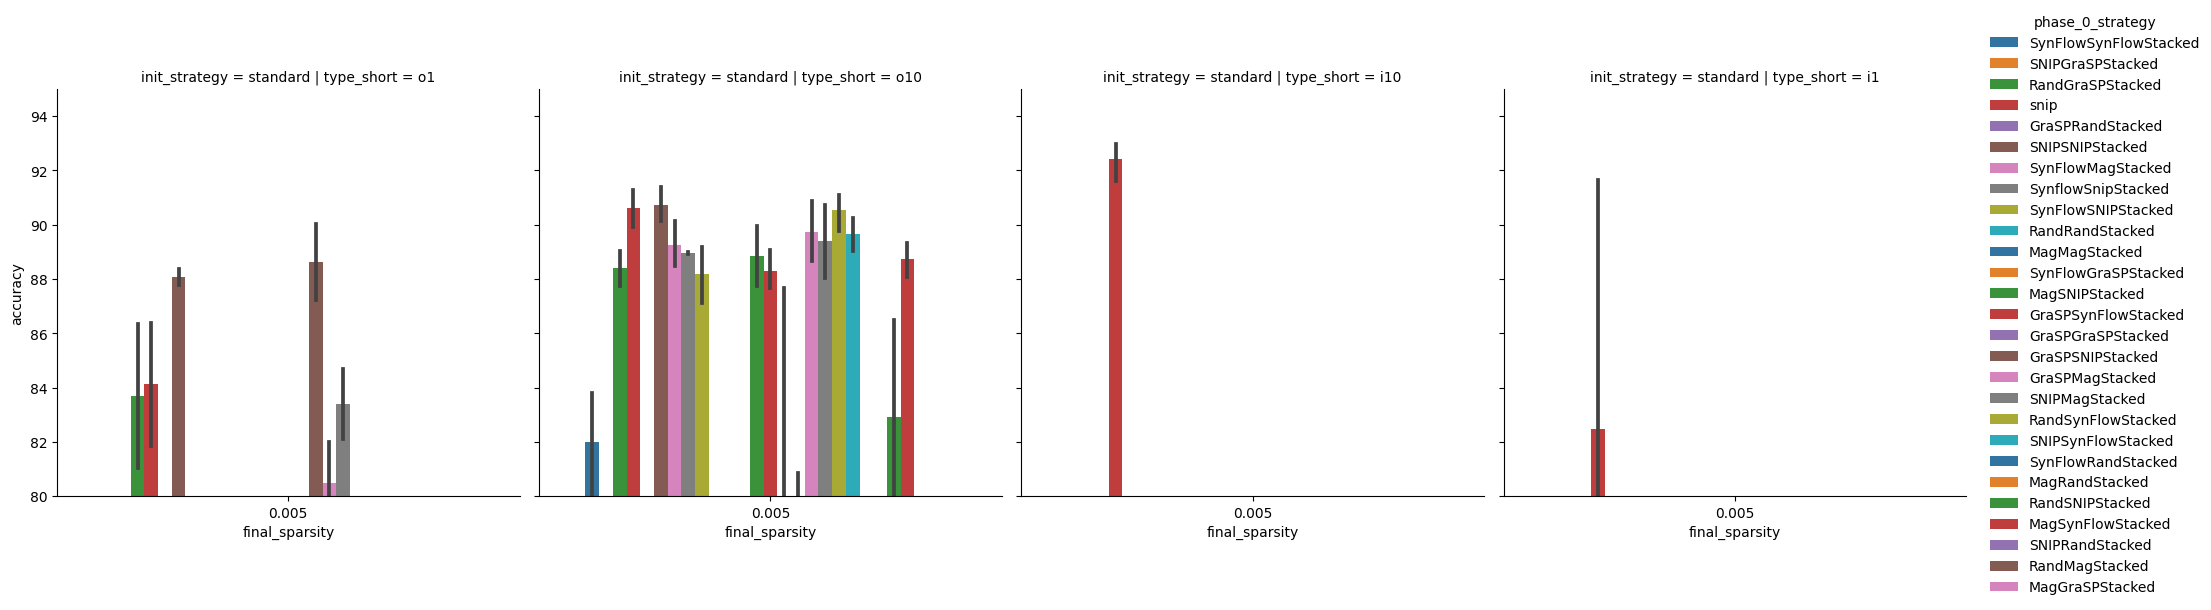

In [4]:
g = sns.catplot(data=df.query(" \
(phase_0_strategy.str.endswith('Stacked') or phase_0_strategy == 'snip') \
and init_strategy == 'standard' \
and final_sparsity == '0.005'"), x="final_sparsity", y="accuracy", row="init_strategy", col="type_short", hue="phase_0_strategy", palette="tab10", kind="bar")
g.set(ylim=(80, 95))

In [4]:

g = sns.FacetGrid(df, col="init_strategy", margin_titles=True, despine=False, legend_out=True)
g.map_dataframe(sns.stripplot, x="total_iterations", y="accuracy", hue="phase_0_strategy", palette="tab10")
g.add_legend()

In [6]:
df_005 = df[(df["final_sparsity"] == "0.005") & (df["type_short"] == "o1")]


<AxesSubplot:xlabel='phase_0_strategy', ylabel='accuracy'>

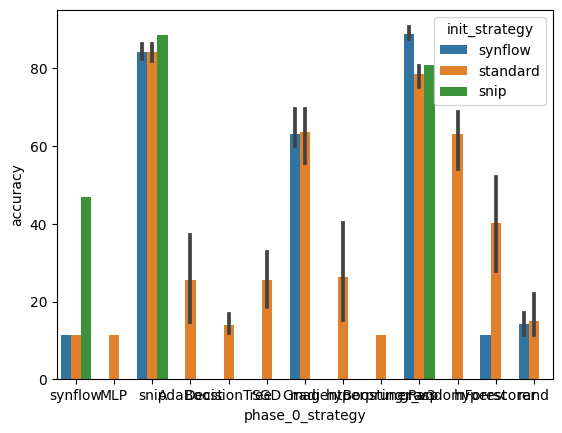

In [7]:
sns.barplot(data=df_005, x="phase_0_strategy", y="accuracy", hue="init_strategy")

[(85.0, 92.0)]

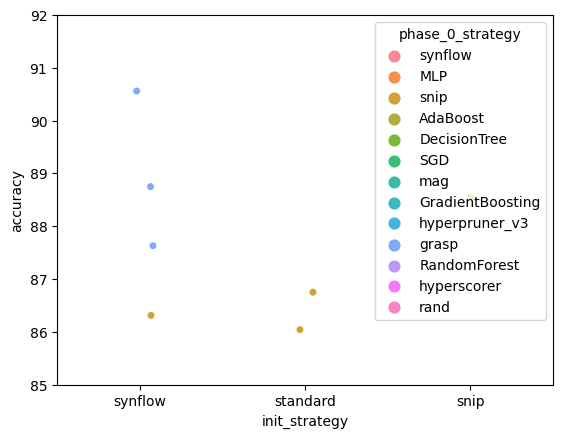

In [8]:
g = sns.stripplot(data=df_005, x="init_strategy", y="accuracy", hue="phase_0_strategy")
g.set(ylim=(85, 92))

In [9]:
df_overview = df[["final_sparsity", "phase_0_strategy", "type_short", "init_strategy","accuracy", "total_iterations","file"]].groupby(["final_sparsity", "phase_0_strategy", "type_short","init_strategy"]).agg({"accuracy": "mean", "file": "count", "total_iterations": "mean"}).reset_index()

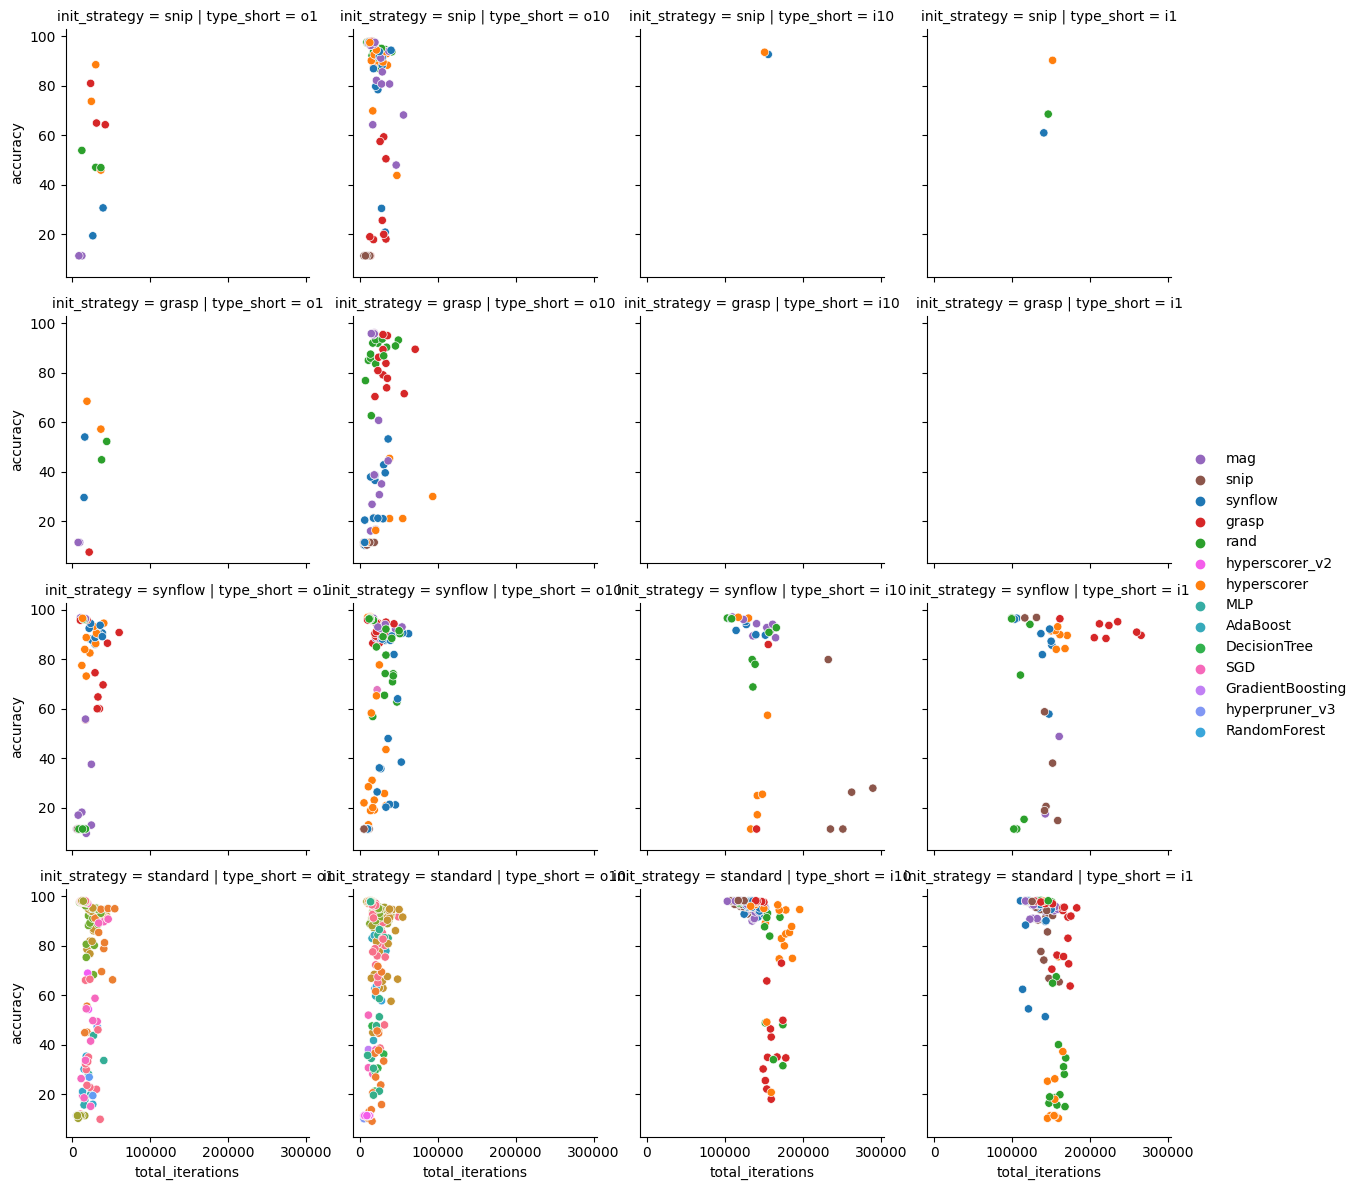

In [10]:
# df_plot= df[df["final_sparsity"] == 0.1]
df_plot = df
g = sns.FacetGrid(df_plot, col="type_short", row="init_strategy")
g.map_dataframe(sns.scatterplot, x="total_iterations", y="accuracy", hue="phase_0_strategy")
g.add_legend()

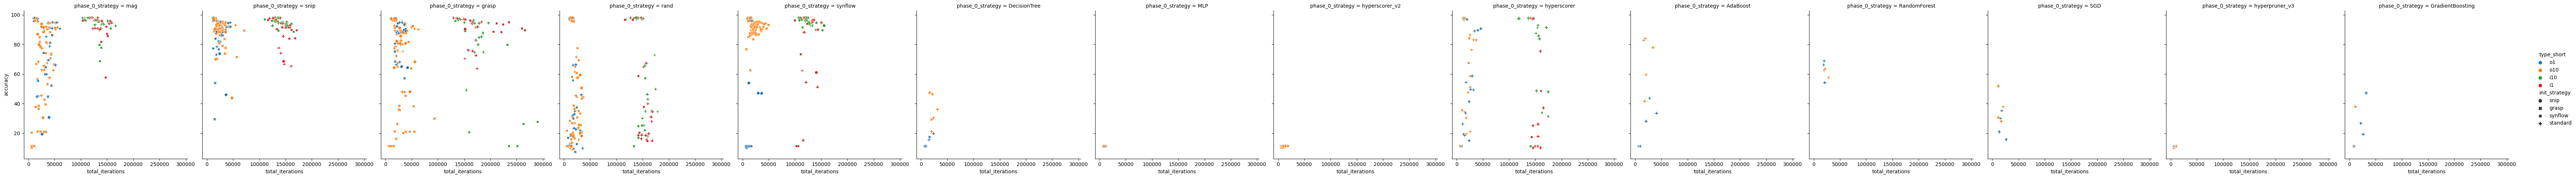

In [11]:
# sns.scatterplot(data=df, x="total_iterations", y="accuracy", hue="phase_0_strategy", style="type_short")
sns.relplot(
    data=df, x="total_iterations", y="accuracy",
    col="phase_0_strategy", hue="type_short", style="init_strategy",
    kind="scatter"
)

Performance of different algos / experiment types

[(88.0, 98.0)]

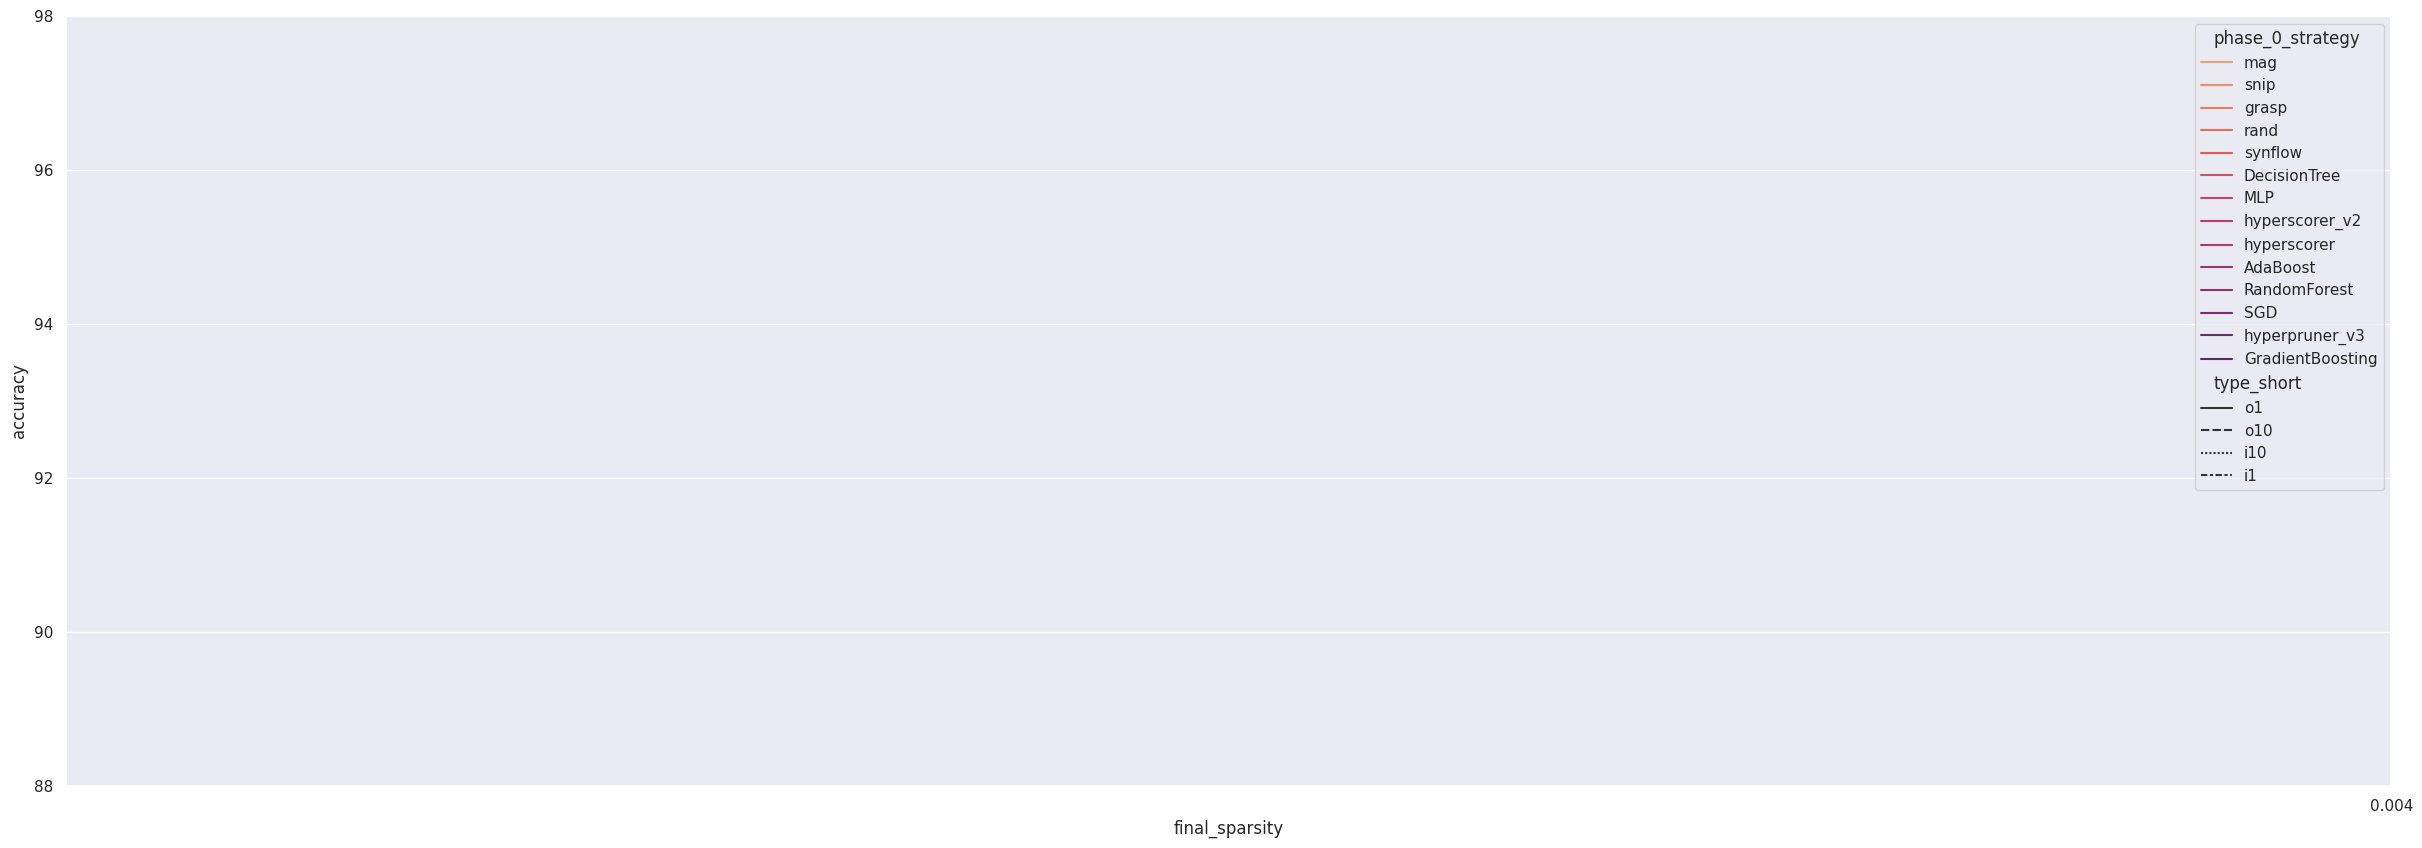

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30, 10)})

plt = sns.lineplot(data=df, x="final_sparsity", y="accuracy", hue="phase_0_strategy", style="type_short",  palette="flare")
plt.set(xlim=(0.2, 0.00))
plt.set(ylim=(88, 98))

<AxesSubplot:xlabel='phase_0_strategy', ylabel='accuracy'>

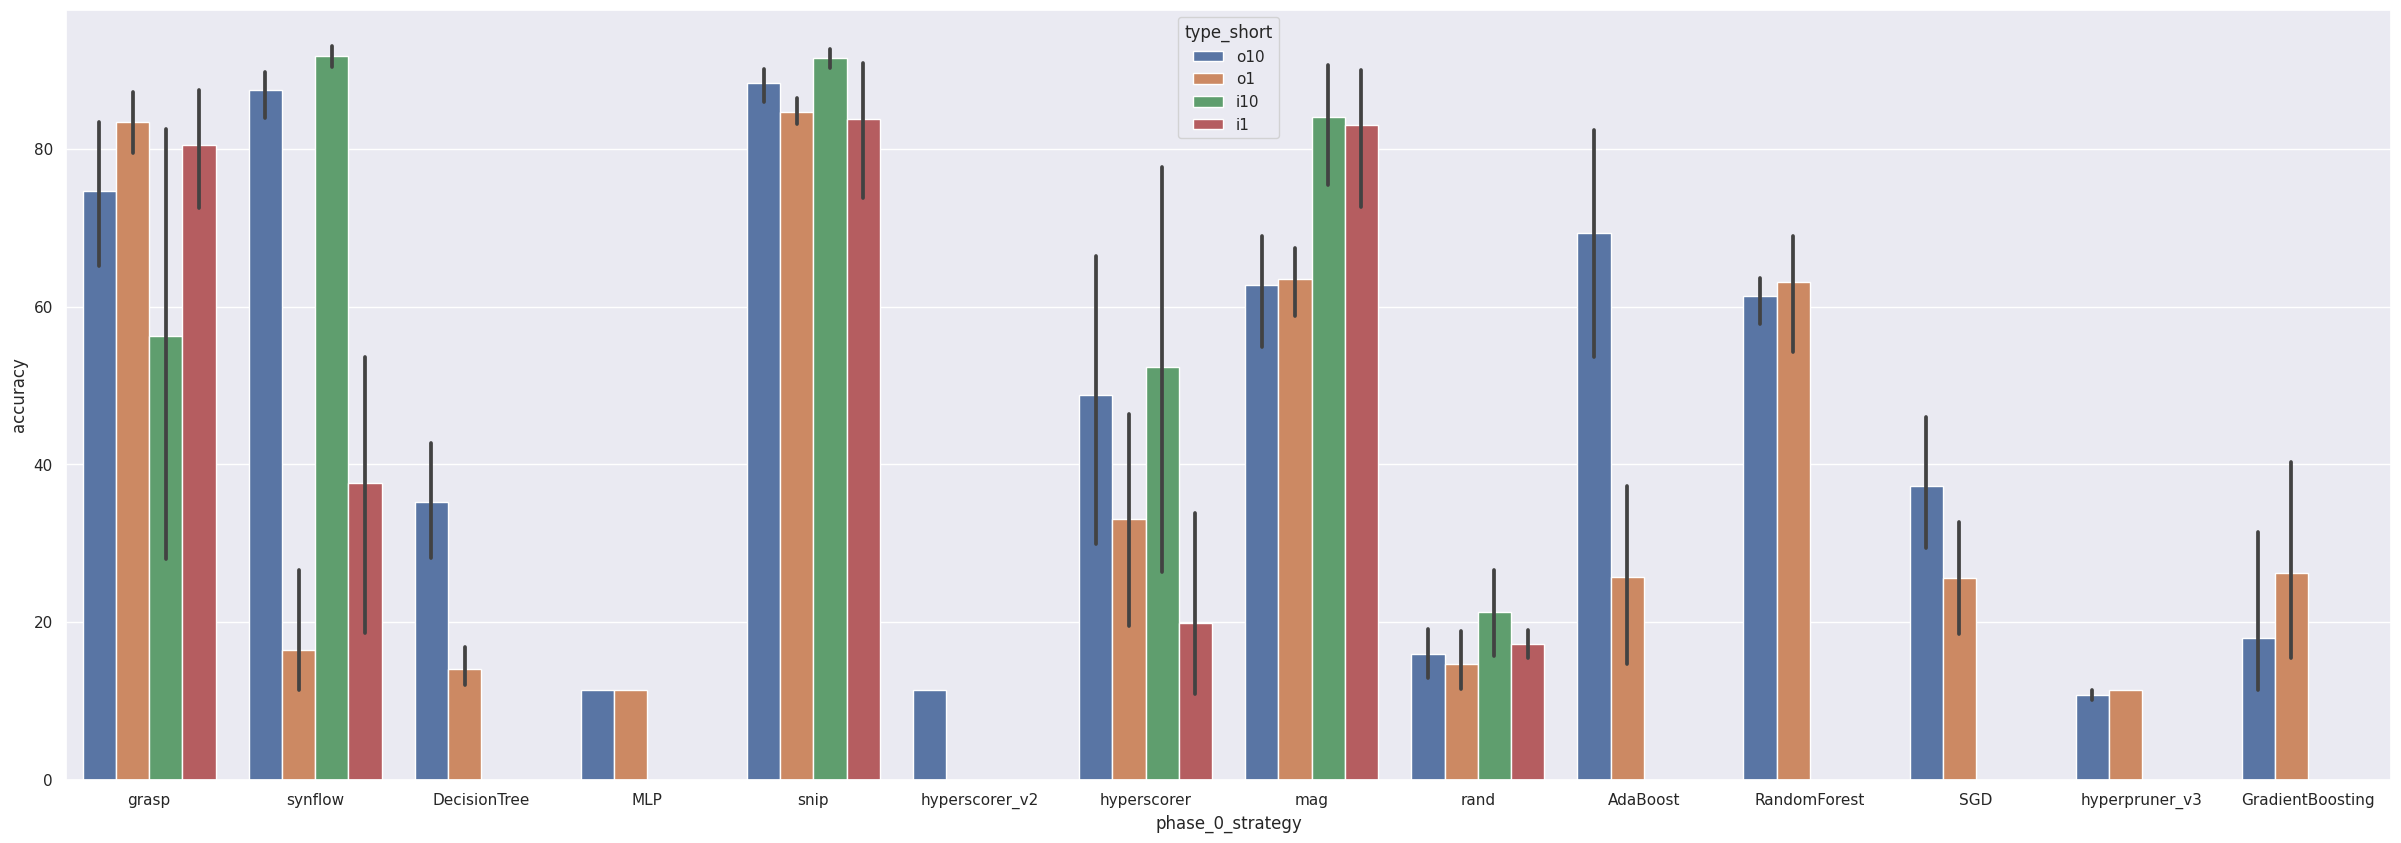

In [13]:
sns.barplot(data=df[df["final_sparsity"] == "0.005"], x="phase_0_strategy", y="accuracy", hue="type_short")

### Storyline

jeder algo ist für jede sparsity dann am besten, wenn man ihn iterative anwendet

# How well does bi-modal init work?

in terms of accuracy

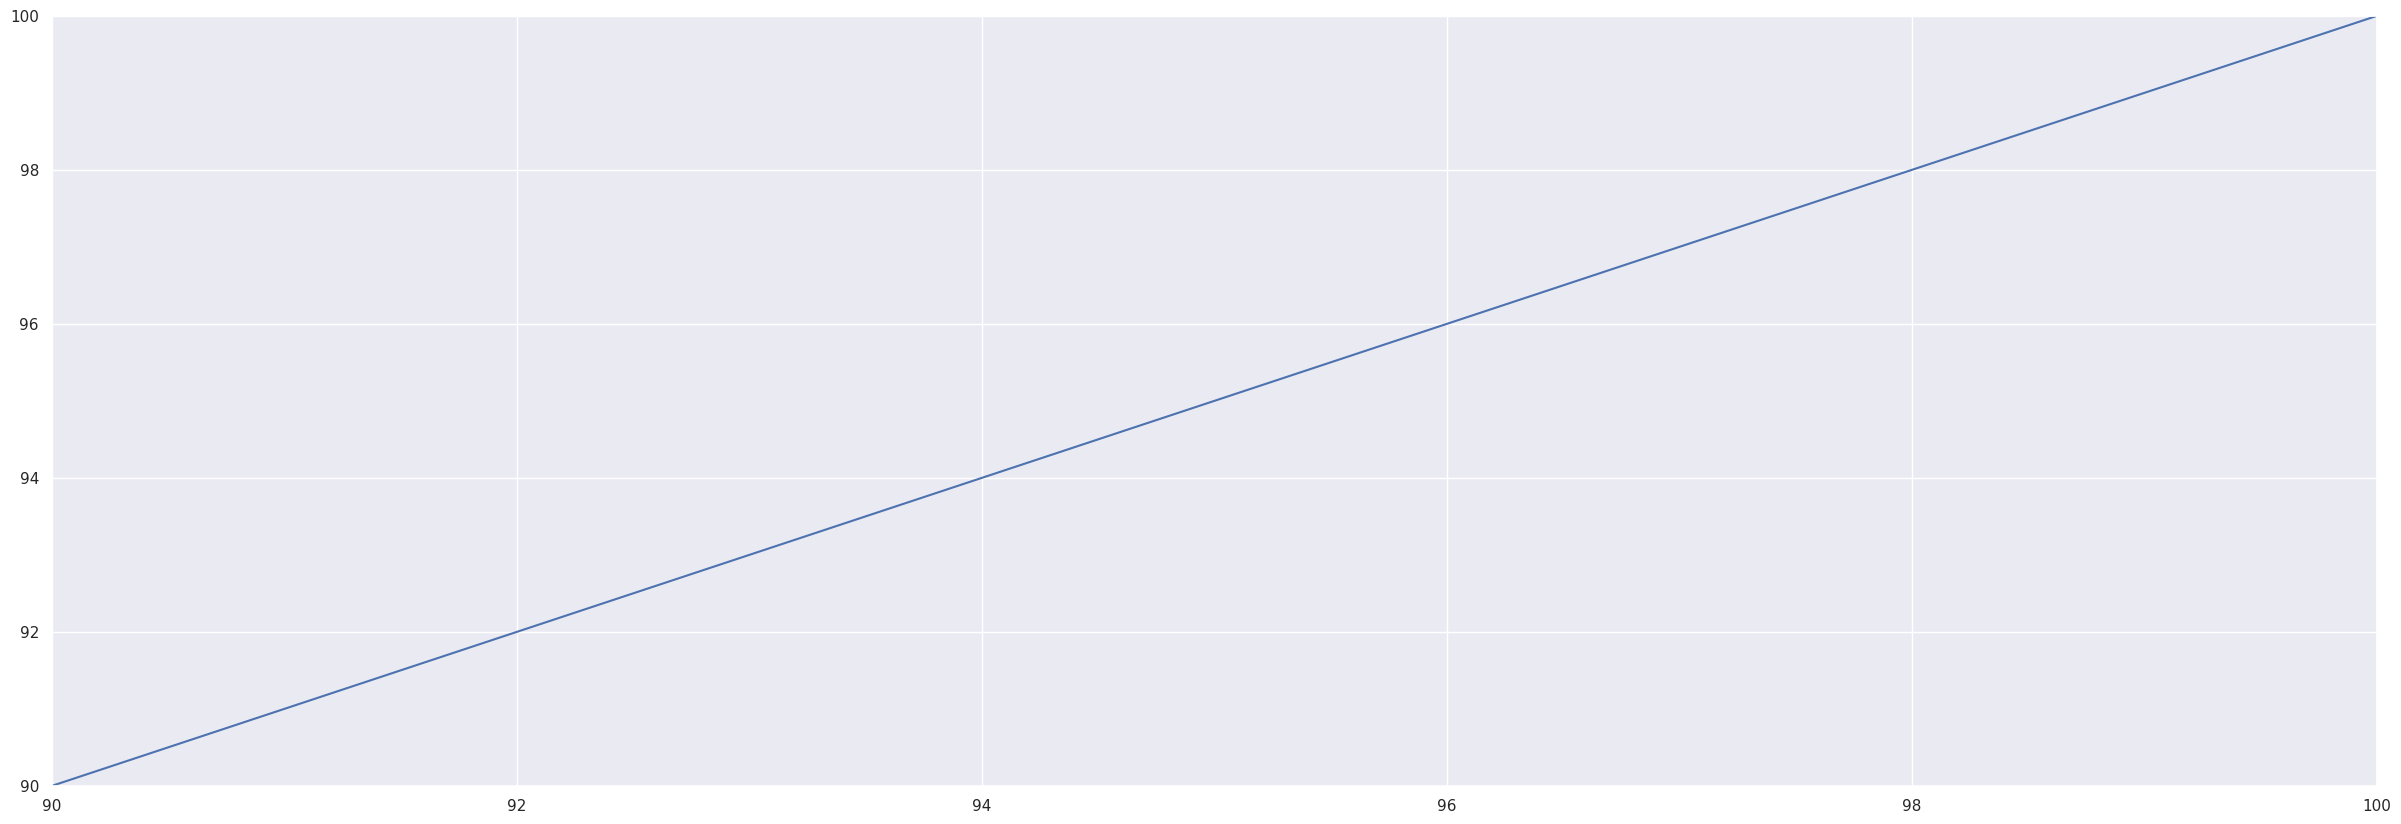

In [14]:
from analysis.results_utils import load_csv


df = load_csv()


df = df[df["type_short"] == "o10"][['init_strategy',
    'repeat_nr', 'final_sparsity', 'accuracy',
    'total_iterations',
    'phase_0_strategy', 
    'type_short']]
df_standard = df[df["init_strategy"] == "standard"]
df_bimodal = df[df["init_strategy"] == "bi-modal"]
df = df_standard.merge(df_bimodal, on=["repeat_nr", "final_sparsity", "phase_0_strategy", "type_short"], how="inner", suffixes=("_standard", "_bimodal"))

g = sns.scatterplot(data=df, x="accuracy_standard", y="accuracy_bimodal", hue="phase_0_strategy")
g.set(xlim=(90, 100))
g.set(ylim=(90, 100))

import numpy as np

x = np.linspace(0, 100, 5)
y = np.linspace(0, 100, 5)
g.plot(x, y)

in terms of total-iterations

In [15]:
from analysis.results_utils import load_csv


df = load_csv()


# df = df[df["type_short"] == "o10"][['init_strategy',
    # 'repeat_nr', 'final_sparsity', 'accuracy',
    # 'total_iterations',
    # 'phase_0_strategy', 
    # 'type_short']]
df_standard = df[df["init_strategy"] == "standard"]
df_bimodal = df[df["init_strategy"] == "bi-modal"]
# df = df_standard.merge(df_bimodal, on=["repeat_nr", "final_sparsity", "phase_0_strategy", "type_short"], how="inner", suffixes=("_standard", "_bimodal"))

g = sns.scatterplot(data=df, x="total_iterations_standard", y="total_iterations_bimodal", hue="phase_0_strategy")


import numpy as np

x = np.linspace(0, 40000, 5)
y = np.linspace(0, 40000, 5)
g.plot(x, y)

ValueError: Could not interpret value `total_iterations_standard` for parameter `x`

# Load Weights

<AxesSubplot:ylabel='Frequency'>

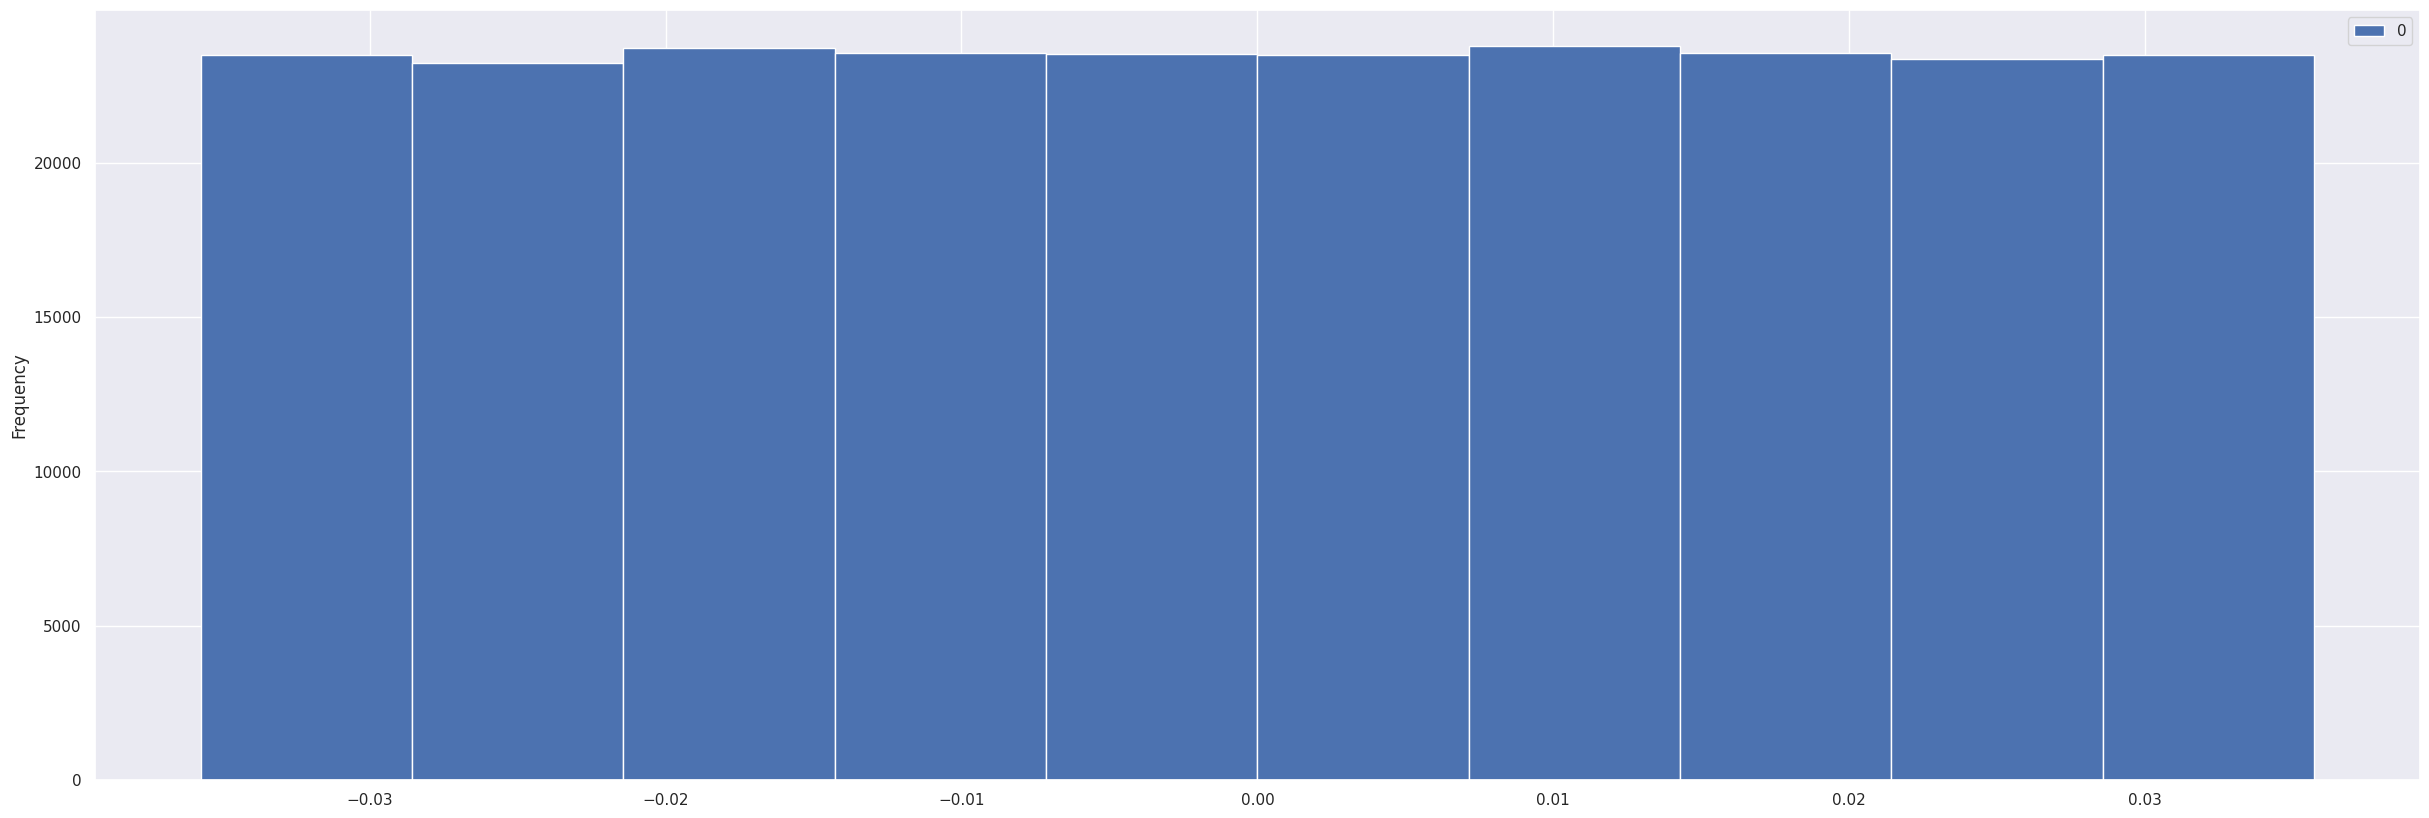

In [ ]:
import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}

inits = get_tensor(
    **experiment,
    kind="initial_weight",
)

pd.DataFrame(inits.flatten().detach().cpu().numpy()).plot.hist()


<AxesSubplot:>

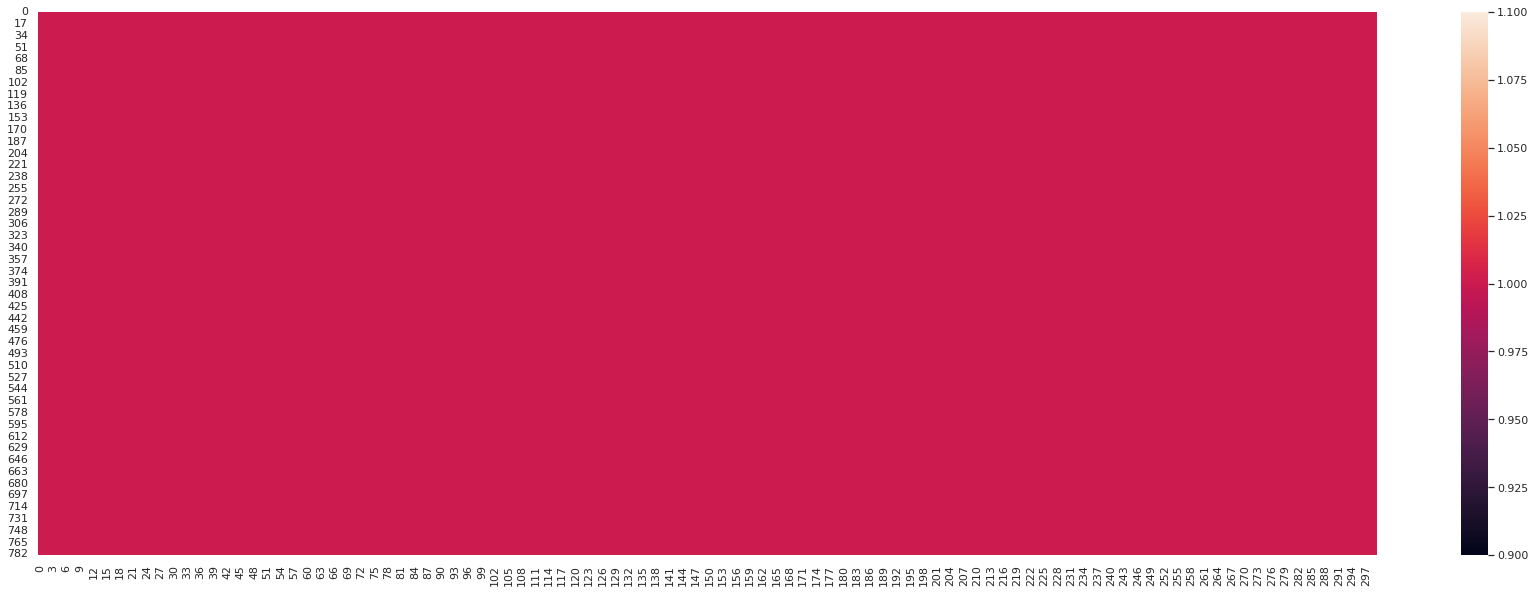

In [13]:
import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "5f1dd52e-dac5-11ec-b7f4-0242ac120004",
    "sparsity": 0.005,
    "experiment_type": "o1",
    "algo": "snip",
    "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}

movement = get_tensor(
    **experiment,
    kind="movement",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)
inits = get_tensor(
    **experiment,
    kind="initial_weight",
)

scores = get_tensor(
    **experiment,
    kind="score",
)
import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
sns.heatmap(torch.abs(scores).cpu().detach().numpy()> 0)#,mask = ~mask.cpu().detach().numpy(), cmap="flare")

In [ ]:
import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.01,
    "experiment_type": "i10",
    "algo": "synflow",
    "layer_name": "fc_layers.1.weight",
}

movement = get_tensor(
    **experiment,
    kind="movement",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)
inits = get_tensor(
    **experiment,
    kind="initial_weight",
)

import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
sns.heatmap(torch.abs(movement).cpu().detach().numpy(),mask = ~mask.cpu().detach().numpy(), cmap="flare")

TypeError: get_tensor() missing 1 required positional argument: 'init_strategy'

In [ ]:
import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.01,
    "experiment_type": "i10",
    "algo": "synflow",
    "layer_name": "fc.weight",
    "init_strategy": "standard"
}

movement = get_tensor(
    **experiment,
    kind="movement",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)
inits = get_tensor(
    **experiment,
    kind="initial_weight",
)

import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
sns.heatmap(torch.abs(movement).cpu().detach().numpy(),mask = ~mask.cpu().detach().numpy(), cmap="flare")


In [ ]:
mask.size()

<AxesSubplot:>

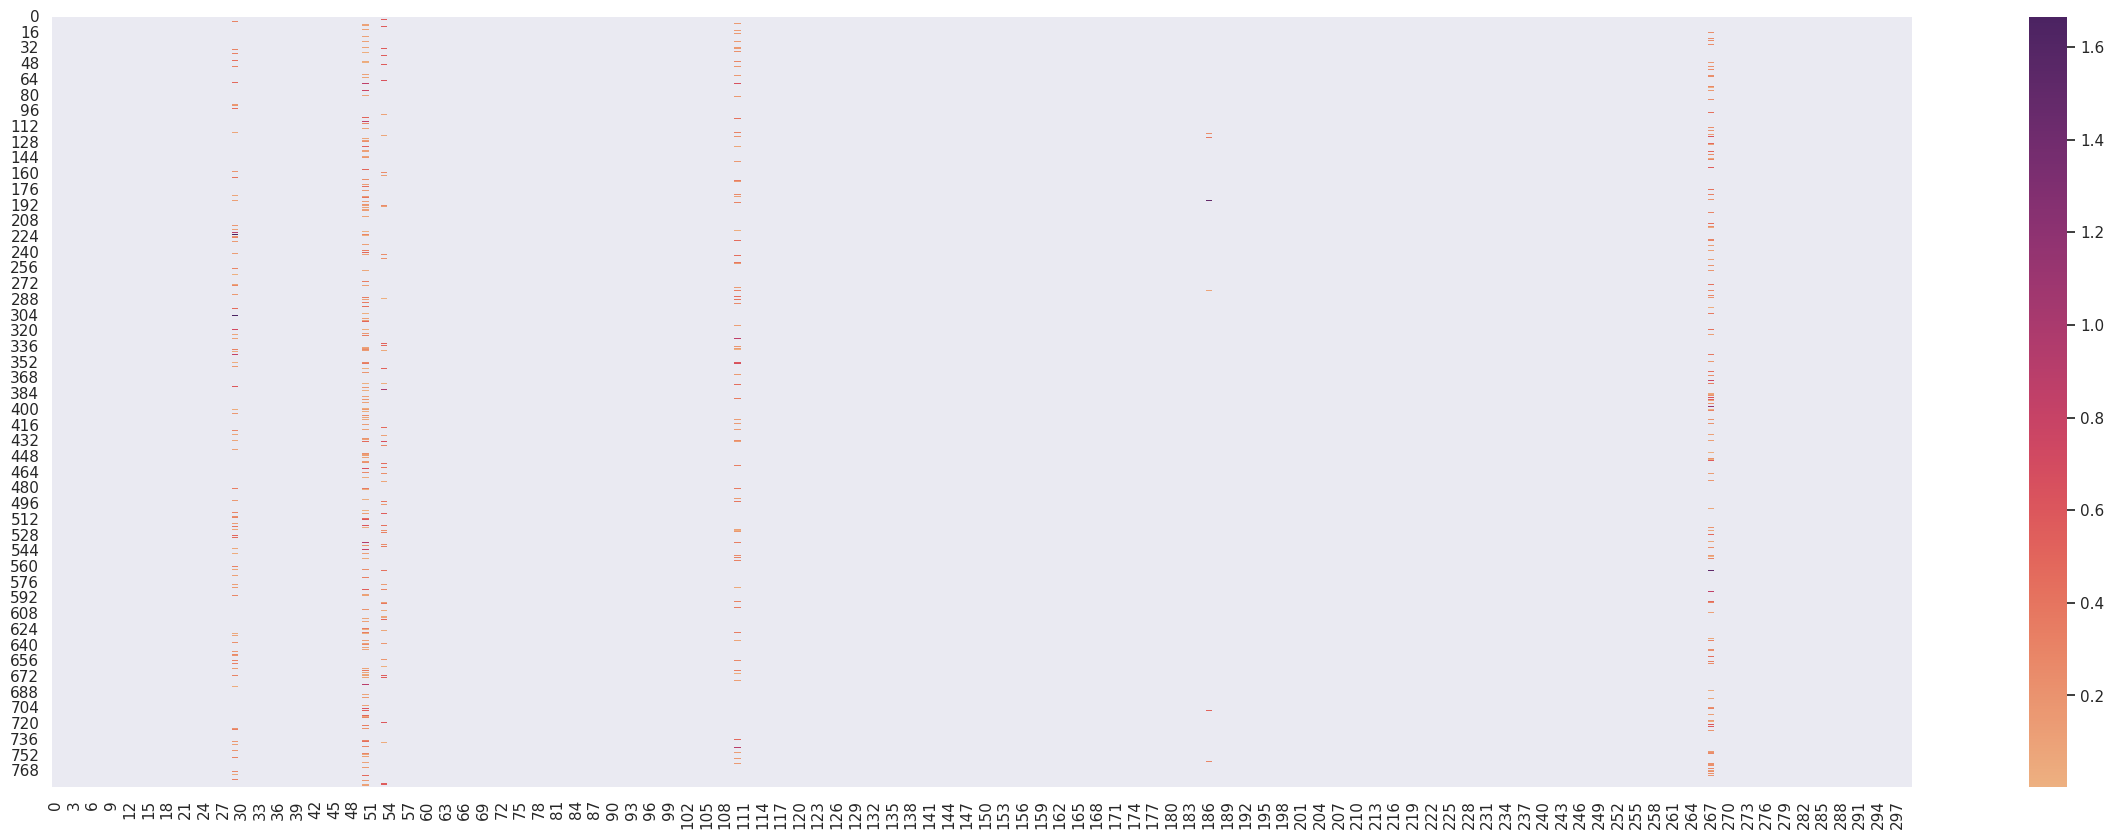

In [ ]:
import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "o10",
    "algo": "synflow",
    "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}

movement = get_tensor(
    **experiment,
    kind="movement",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)
inits = get_tensor(
    **experiment,
    kind="initial_weight",
)


import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
sns.heatmap(torch.abs(movement).cpu().detach().numpy(),mask = ~mask.cpu().detach().numpy(), cmap="flare")

In [6]:
from analysis.results_utils import get_tensors
#  sanity check, number of trues in mask for each sparsity
experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc.weight",
    "init_strategy": "standard"
}

all_ts = get_tensors(**experiment)
size = all_ts[0]["t"].size()
numel = size[0] * size[1]
[f'{item["sparsity"]} -> {torch.sum(item["t"])/numel} ({item["t"].size()})' for item in all_ts]

get_tensors found 0 tensors


IndexError: list index out of range

In [ ]:
numel

# The weight explorer

In [2]:
from analysis.results_utils import print_histograms


# pin specific attributes or leave all options in
experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc.weight",
    "init_strategy": "standard"
}
df_tensors = pd.DataFrame(get_tensors(**experiment, masked=False))
print_histograms(df_tensors, row="experiment_type", col="algo", label="sparsity", kde=False)


ModuleNotFoundError: No module named 'analysis'

get_tensors found 5 tensors


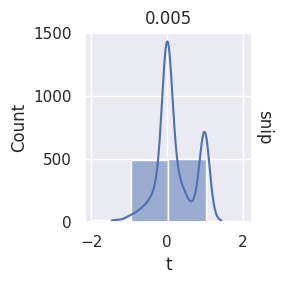

In [ ]:
# pin specific attributes or leave all options in
experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc.weight",
    "init_strategy": "standard"
}

df_tensors = pd.DataFrame(get_tensors(**experiment, masked=True))
print_histograms(df_tensors, row="algo", col="sparsity", label="experiment_type")

In [3]:
# pin specific attributes or leave all options in
experiment = {
    "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.2,
    "experiment_type": "o1",
    "algo": "synflow",
    "layer_name": "fc_layers.0.weight",
    "kind": "initial_weight",
    "init_strategy": "standard"
}

df_tensors = pd.DataFrame(get_tensors(**experiment, masked=True))
print_histograms(df_tensors, row="algo", col="sparsity")

NameError: name 'get_tensors' is not defined

get_tensors found 36 tensors


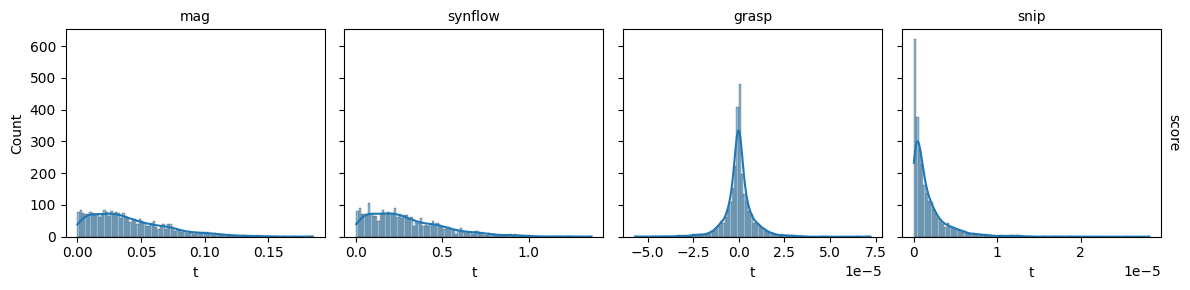

In [9]:
# pin specific attributes or leave all options in

from analysis.results_utils import print_histograms

experiment = {
    # "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.2,
    "experiment_type": "o1",
    "algo": ["snip", "grasp", "synflow", "mag"],
    "layer_name": "fc_layers.0.weight",
    "kind": "score",
    "init_strategy": "standard"
}
# import pandas as pd
df_tensors = pd.DataFrame(get_tensors(**experiment, masked=False))
print_histograms(df_tensors,  col="algo", sharex=False)

Takeaway:
alle algos in der besten form approximieren die gleiche verteilung

# Todos
what pct of available weights in a given bin have been selected by the algo? are there ranges that are faveoured by the algo?

# Correlation between Scores

In [ ]:
# import os
# os.chdir("/workspaces/BAIT")

# import torch
# import pandas as pd
# from typing import List

# from convert_states_to_results import load_state

# FILE_PATH = "./analysis/results/results_combined.csv"
# df = load_csv(FILE_PATH)

# def create_tensors():
#     return pd.DataFrame()

# def add_tensor(tensors: pd.DataFrame, **kwargs):
#     combined_df = pd.concat([tensors, pd.DataFrame.from_dict({k: v for k, v in kwargs.items()}, orient="index").T])
#     return combined_df

# def convert_states(df):
#     tensors = create_tensors()
#     for file, algo, init_id, sparsity in zip(df["file"], df["phase_0_strategy"], df["base_model_id"], df["final_sparsity"]): #10 rows per loop added
#         s = load_state(file)

#         params = [(name, param) for name, param in s.model.named_parameters() if name.endswith(".weight")]
#         init_params = [(name, param) for name, param in s.initial_state.model.named_parameters() if name.endswith(".weight")]
        
#         for (layer_name, init_param), (_, param), (_, score) in zip(init_params, params, s.pruner.scores.items()):
#             per_kind = {
#                 "initial_weight": init_param.T,
#                 "final_weight": param.T,
#                 "mask": (param.T != init_param.T),
#                 "score": torch.transpose(score, 0, 1),
#                 "movement": param.T - init_param.T
#             }
#             for kind, t in per_kind.items():
#                 tensors = add_tensor(tensors, init_id=init_id, layer_name=layer_name, kind=kind, algo=algo, sparsity=sparsity, t=t)
#     return tensors

# def filter(tensors: pd.DataFrame, init_id = None, layer_name = None, kind = None, sparsity = None, algo = None):
#     filtered = tensors.copy()
#     if init_id:
#         filtered = filtered[filtered["init_id"] == init_id]
#     if layer_name:
#         filtered = filtered[filtered["layer_name"] == layer_name]
#     if kind:
#         filtered = filtered[filtered["kind"] == kind]
#     if sparsity:
#         filtered = filtered[filtered["sparsity"] == sparsity]
#     if algo:
#         filtered = filtered[filtered["algo"] == algo]
    
#     return filtered
        
# def iter_tensors(tensors: pd.DataFrame):
#     for init_id, layer_name, kind, algo, sparsity, t in zip(tensors["init_id"], tensors["layer_name"], tensors["kind"], tensors["sparsity"], tensors["algo"], tensors["t"]):
#         yield init_id, layer_name, kind, algo, sparsity, t

# def to_list(tensors: pd.DataFrame) -> List[torch.Tensor]:
#     return list(tensors["t"])

# def mask(t, m):
#     return torch.masked_select(t, m)

# def get_tensor(tensors, init_id = None, layer_name = None, kind = None, sparsity = None, algo = None):
#     filtered = filter(tensors, init_id, layer_name, kind, sparsity, algo)
#     if len(filtered) > 1:
#         print(f"warning: trying to get 1, but there are {len(filtered)}")
#     return filtered.loc[0]["t"]

# def apply_masks(tensors: pd.DataFrame):
#     masked_tensors = create_tensors()
#     for init_id, layer_name, kind, sparsity, algo, t in iter_tensors(tensors):
#         if kind != "mask":
#             m = get_tensor(tensors, init_id, layer_name, "mask", sparsity, algo)
#             masked_t = mask(t, m)
#             masked_tensors = add_tensor(masked_tensors, init_id=init_id, layer_name=layer_name, kind=kind, sparsity=sparsity, algo=algo, t=masked_t)
    
#     # add the masks for completeness:
#     masked_tensors = pd.concat([masked_tensors, tensors[tensors["kind"] == "mask"]])
#     return masked_tensors

# def load_all(init_id = None, layer_name = None, kind = None, sparsity = None, algo = None, apply_mask = True):
#     df = load_csv(FILE_PATH)
#     all_tensors = convert_states(df)
#     # apply masks before filtering to avoid having the masks filtered out before applied
#     if apply_mask:
#         all_tensors = apply_masks(all_tensors)

#     all_tensors = filter(all_tensors, init_id, layer_name, kind, sparsity, algo)
#     return all_tensors


# def get_unique(tensors, init_id = False, layer_name = False, kind = False, sparsity = False, algo = False):
#     """mark true the attributes that should be part of the tuples that are part of the set of combinations returned"""

#     cols = [col_name for col_name, b in zip(["init_id", "layer_name", "kind", "sparsity", "algo"], [init_id, layer_name, kind, sparsity, algo]) if b]
#     filtered = tensors[cols]

#     return filtered.groupby(cols).mean().reset_index().to_records(index=False)

# def to_numpy(t):
#     return t.detach().cpu().numpy()

# def get_score_corr_matrix(all_scores, init_id):
#     def get_algo(algo):
#         return get_tensor(all_scores, init_id=init_id, algo=algo)

#     df_corr = pd.DataFrame(data={algo: to_numpy(get_algo(algo)).ravel() for (algo,) in get_unique(all_scores, algo=True) if not get_algo(algo) is None})
#     df_corr = df_corr.corr().sort_values(by=list(df_corr.columns), axis=0, ascending=False).sort_values(by=list(df_corr.columns), axis=1, ascending=False)
#     return df_corr


check if different algos correlate for same initial weights (specified by init_id)

## Single Element

In [ ]:
import seaborn as sns

init_id = 'f54b94c6-cb0e-11ec-8708-0242ac120004'
layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, kind="score", sparsity=0.2, apply_mask=False)
sns.heatmap(get_score_corr_matrix(all_scores,init_id), cmap="Blues")

## Avg accross all elements

In [ ]:
layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, kind="score", sparsity=0.2, apply_mask=False)

dfs = []
for (init_id,) in get_unique(all_scores,init_id=True):
    dfs.append(get_score_corr_matrix(all_scores, init_id))

df_corr = None
for df in dfs:
    if df_corr is None:
        df_corr = df
    else:
        df_corr = df_corr.add(df).div(2.0)

sns.heatmap(df_corr, cmap="Blues")

# calculate overlap

In [ ]:
from itertools import product, permutations
import numpy as np

def get_selected(sparsity_pct, t):
    t_flat = t.flatten()
    k = int(t_flat.numel() * sparsity_pct)
    v, i = torch.topk(t_flat,k)
    s = set(i.tolist())
    return s

def get_all_algo_combos(all_scores, n):
    all_algos = [a for (a,) in get_unique(all_scores, algo=True)]
    all_algos.remove("ensemble")
    combos = tuple(permutations(all_algos, n))
    combos = sorted(tuple(sorted(t) for t in combos))
    combos = set(tuple(tuple(t) for t in combos))
    return combos


def get_overlap(all_scores, n=2):
    combo_overlap = []
    for sparsity_pct in np.linspace(0.01, 1, 100):
        for algo_combo in get_all_algo_combos(all_scores, n):
            for (init_id,) in get_unique(all_scores, init_id=True):
                ts = [get_tensor(all_scores, init_id=init_id, algo=algo) for algo in algo_combo]
                ss = [get_selected(sparsity_pct, t) for t in ts]
                overlap = len(ss[0].intersection(ss[1]))
                k = len(ss[0])

                overlap_pct = overlap / k
                combo_overlap.append({
                    "combo": algo_combo,
                    "algo1": algo_combo[0],
                    "algo2": algo_combo[1],
                    "sparsity": sparsity_pct,
                    "overlap": overlap,
                    "overlap_pct": overlap_pct
                })
    return combo_overlap



In [ ]:
# specific init
init_id = 'f54b94c6-cb0e-11ec-8708-0242ac120004'
layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, init_id=init_id, kind="score", sparsity=0.2, apply_mask=False)
combo_overlap = get_overlap(all_scores)

import pandas as pd
import seaborn as sns

df =pd.DataFrame.from_dict(combo_overlap)
sns.set(rc={'figure.figsize':(30, 10)})
p = sns.lineplot(data=df, x="sparsity", y="overlap_pct", hue="combo", palette="flare")

In [ ]:

layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, kind="score", sparsity=0.2, apply_mask=False)
combo_overlap = get_overlap(all_scores)

import pandas as pd
import seaborn as sns

df =pd.DataFrame.from_dict(combo_overlap)
sns.set(rc={'figure.figsize':(30, 10)})
p = sns.lineplot(data=df, x="sparsity", y="overlap_pct", hue="combo", palette="flare")

In [ ]:
## 3x pairings
layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, kind="score", sparsity=0.2, apply_mask=False)
combo_overlap = get_overlap(all_scores, 3)

import pandas as pd
import seaborn as sns

df =pd.DataFrame.from_dict(combo_overlap)
sns.set(rc={'figure.figsize':(30, 10)})
p = sns.lineplot(data=df, x="sparsity", y="overlap_pct", hue="combo", palette="flare")

In [ ]:
## 4x pairings
layer="fc_layers.0.weight"
all_scores = load_all(layer_name=layer, kind="score", sparsity=0.2, apply_mask=False)
combo_overlap = get_overlap(all_scores, 4)

import pandas as pd
import seaborn as sns

df =pd.DataFrame.from_dict(combo_overlap)
sns.set(rc={'figure.figsize':(30, 10)})
p = sns.lineplot(data=df, x="sparsity", y="overlap_pct", hue="combo", palette="flare")

# Find complementary pairings

In [ ]:
# TODO: which ones are complementary?
# TODO: build pruner, which selects the topk overlapping weights
# TODO: heatmap of overlaps? histogram? which values are pruned by all?
# TODO: calculate "ground truth scores", IMP? with best hyper parameters?

# Paralell Categories: Where did the weights go?

In [ ]:
import os
os.chdir("/workspaces/BAIT")

import numpy as np
import pandas as pd
import torch
import seaborn as sns
from analysis.results_utils import *

import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.2,
    "experiment_type": "i10",
    "algo": "synflow",
    "layer_name": "fc_layers.1.weight",
    "init_strategy": "standard"
}


inits = get_tensor(
    **experiment,
    kind="initial_weight",
)
finals = get_tensor(
    **experiment,
    kind="final_weight",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)


inits_m = torch.masked_select(inits, mask).abs_()
finals_m = torch.masked_select(finals, mask).abs_()

# decimals = 2
# inits_m_r = torch.round(inits_m, decimals=decimals)
# finals_m_r = torch.round(finals_m, decimals=decimals)


# inits_m_h, bins_t = torch.histogram(inits_m.cpu(), bins=bins, range=range)
# finals_h, _ = torch.histogram(finals.cpu(), bins=bins, range=range)

# bins_l = bins.tolist()
# t_plot = t.detach().cpu().flatten().numpy()
# sns.histplot(pd.DataFrame(t_plot), bins=100)

# bin_centers = bins_t.detach().apply_(lambda x: x + ((sum(abs(lim) for lim in range)) / bins))
# bin_centers = (bin_centers* 100).trunc_() / 100

def get_hist_bin(x, bin_centers):
    abs_diff_to_bins = np.abs(bin_centers - x)
    index_lowest_diff = np.argmin(abs_diff_to_bins)
    bin_center = bin_centers[index_lowest_diff]
    return bin_center

# # Dual bin version (left and right different)
# bins_init = 50
# lim_init = 0.3
# bin_centers_inits = np.linspace(-lim_init, lim_init, bins_init)

# bins_finals = 20
# lim_finals = 1.2
# bin_centers_finals = np.linspace(-lim_finals, lim_finals, bins_finals)

# inits_m_indexes = inits_m.detach().cpu().apply_(lambda x: get_hist_bin(x, bin_centers_inits))
# finals_m_indexes = finals_m.detach().cpu().apply_(lambda x: get_hist_bin(x, bin_centers_finals))

# single bin version (left and right same bins)
bins_finals = 20
lim_finals = 1.2
bin_centers_finals = np.linspace(0, lim_finals, bins_finals)

inits_m_indexes = inits_m.detach().cpu().apply_(lambda x: get_hist_bin(x, bin_centers_finals))
finals_m_indexes = finals_m.detach().cpu().apply_(lambda x: get_hist_bin(x, bin_centers_finals))

df = pd.DataFrame(
        torch.stack(
            (inits_m_indexes, finals_m_indexes)
        ).detach().cpu().numpy()
    ).T.rename(
        columns={0: "inits", 1: "finals"}
    )


inits_pruned = torch.masked_select(inits, ~mask).abs_()
inits_pruned_index = inits_pruned.detach().cpu().apply_(lambda x: get_hist_bin(x, bin_centers_finals))

df_pruned = pd.DataFrame(
    inits_pruned_index.detach().cpu().numpy()
).T.rename(
        columns={0: "inits"}
)
# df = pd.concat([df, df_pruned.T.rename(columns={0: "inits"})])

df["col"] = abs(df["finals"].astype(float) - df["inits"].astype(float))
df["finals"] = df["finals"].fillna("pruned")

df = df.sort_values(by=["inits", "finals"])
df["inits"] = df["inits"].apply(lambda x:  f"{x:.2f}")
df["finals"] = df["finals"].apply(lambda x: f"{x:.2f}" if not isinstance(x, str) else x)


import plotly.express as px
fig = px.parallel_categories(df, dimensions=["inits", "finals"],
    color="col", color_continuous_scale=px.colors.sequential.Inferno,
)

fig.show()

In [ ]:
import os
os.chdir("/workspaces/BAIT")

import numpy as np
import pandas as pd
import torch
import seaborn as sns
from analysis.results_utils import *

import torch
from analysis.results_utils import get_tensor
import pandas as pd

experiment = {
    # "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "synflow",
    "layer_name": "fc_layers.1.weight",
    "init_strategy": "standard"
}

ts = get_tensors(**experiment)
experiment.update({"init_id": ts[0]["init_id"]})
inits = get_tensor(
    **experiment,
    kind="initial_weight",
)
finals = get_tensor(
    **experiment,
    kind="final_weight",
)
movement = get_tensor(
    **experiment,
    kind="movement",
)
mask = get_tensor(
    **experiment,
    kind="mask",
)
df = pd.DataFrame(torch.stack((inits.flatten(), finals.flatten(), movement.flatten())).detach().cpu().numpy()).T.rename(columns={0:"inits", 1:"finals", 2:"movement"})
df["movement"] = abs(df["movement"])
sns.scatterplot(data=df, x="inits", y="finals", hue="movement", marker="+")

# wo sind die unterschiede zwischen o10 und i10?

In [ ]:
experiment = {
    # "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.005,
    # "experiment_type": "i10",
    "algo": "synflow",
    "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}

ts = get_tensors(**experiment)
experiment.update({"init_id": ts[0]["init_id"]})


experiment_i10 = {**experiment, "experiment_type": "i10"}
i10 = dict(
    inits = get_tensor(
        **experiment_i10,
        kind="initial_weight",
    ),
    finals = get_tensor(
        **experiment_i10,
        kind="final_weight",
    ),
    movement = get_tensor(
        **experiment_i10,
        kind="movement",
    ),
    mask = get_tensor(
        **experiment_i10,
        kind="mask",
    ),
)

experiment_o10 = {**experiment, "experiment_type": "o10"}
experiment.update({"init_id": ts[0]["init_id"]})
o10 = dict(
    inits = get_tensor(
        **experiment_o10,
        kind="initial_weight",
    ),
    finals = get_tensor(
        **experiment_o10,
        kind="final_weight",
    ),
    movement = get_tensor(
        **experiment_o10,
        kind="movement",
    ),
    mask = get_tensor(
        **experiment_o10,
        kind="mask",
    ),
)


In [ ]:
import os
os.chdir("/workspaces/BAIT")
import seaborn as sns
sns.set(rc={'figure.figsize':(30, 15)})
# sns.heatmap(torch.abs(movement).cpu().detach().numpy())

mask_both = i10["mask"] + o10["mask"]
t = torch.zeros_like(i10["mask"]).double()
t = torch.where(i10["mask"] & ~o10["mask"], 1.0, t)
t = torch.where(~i10["mask"] & o10["mask"], 2.0, t)
t = torch.where(i10["mask"] & o10["mask"], 3.0, t)

np_a = t.detach().cpu().numpy()

value_map = {0.0: "none", 1.0: "i10", 2.0:"o10", 3.0:"both"}
n= 4
cmap = sns.color_palette("Blues", n) 

g = sns.heatmap(np.transpose(np_a), cmap=cmap)

colorbar = g.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks(
    [
        colorbar.vmin + r / n * (0.5 + i) 
        for i in range(n)
    ]
)
colorbar.set_ticklabels(list(value_map.values()))   

In [ ]:
len(dfs)

In [ ]:
import os
os.chdir("/workspaces/BAIT")

import numpy as np
import pandas as pd
import torch
import seaborn as sns
from analysis.results_utils import *

import torch
from analysis.results_utils import get_tensor
import pandas as pd


experiment = {
    "init_id": "47ee372c-ce4a-11ec-8633-0242ac120002",
    "sparsity": 0.005,
    "experiment_type": "o10",
    "algo": "synflow",
    # "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}
# ts = get_tensors(**experiment)
# def print_network(experiment):
layers = ["fc_layers.0.weight", "fc_layers.1.weight", "fc.weight"]
dfs = []
for layer in layers:
    masks = {layer: get_tensor(**experiment, kind="mask", layer_name=layer) for layer in layers}
    inits = {layer: get_tensor(**experiment, kind="initial_weight", layer_name=layer) for layer in layers}

    m = masks[layer].detach().cpu()
    t = inits[layer].detach().cpu()

    in_index = torch.arange(m.size()[0]).unsqueeze(1).expand(m.size())
    out_index = torch.arange(m.size()[1]).unsqueeze(1).transpose_(0, 1).expand(m.size())

    from_t = torch.masked_select(in_index, m)
    to_t = torch.masked_select(out_index, m)
    val_t = torch.masked_select(t, m)
    cols = [
        torch.masked_select(in_index, m),
        torch.masked_select(out_index, m),
        torch.masked_select(t, m),
    ]
    df = pd.DataFrame(torch.stack(cols).numpy()).rename({0: "from", 1: "to", 2: "val"}).T


    dfs.append(df)

df = None
for df_next, layer in zip(dfs, layers):
    if df is None:
        df = df_next
        df = df.rename(columns={"from":"input"})
        df["val"] = abs(df["val"]).fillna(0)
        last_layer = layer
    else:
        df = df.merge(df_next, left_on="to", right_on="from", how="left", suffixes=(None,f"_{layer}" ))
        df["to"] = df["to"].fillna(df["from"])
        df = df.drop("from", axis=1)
        df = df.rename(columns={"to":last_layer, f"to_{layer}": "to"})
        df["val"] = df["val"] + abs(df[f"val_{layer}"]).fillna(0)
        df = df.drop(f"val_{layer}", axis=1)
        last_layer=layer

df = df.rename(columns={"to":layer})
df = df.sort_values(by=["input", "fc_layers.0.weight", "fc_layers.1.weight", "fc.weight"])
# df[[	"input"	"fc_layers.0.weight"	"val"	"from"	"fc_layers.1.weight"	"val_fc_layers.1.weight"	"from_fc.weight"	"fc.weight","al_fc.weight"]].fillna(inplace=True)
import plotly.express as px
fig = px.parallel_coordinates(df, dimensions=["input", "fc_layers.0.weight", "fc_layers.1.weight", "fc.weight"],
    color="val", color_continuous_scale=px.colors.sequential.Inferno,
    width=1500, height=4000
)

config = {'staticPlot': True}
fig.show(config=config)




In [ ]:
df

In [ ]:
len(set(df["to"]))

In [ ]:
val_t.size()

In [ ]:
sum([-0.3841,  0.6320,  0.4254, -0.7384])/4

In [ ]:
df_tensors = pd.DataFrame(get_tensors(**experiment, masked=True))
print_histograms(df_tensors, row="algo", col="kind")

In [ ]:
bin_centers

In [ ]:
bins_t

In [ ]:
df = pd.DataFrame(
        torch.stack(
            (inits_m_r, finals_m_r)
        ).detach().cpu().numpy()
    ).T.rename(
        columns={0: "inits", 1: "finals"}
    ).groupby(
        ["inits",  "finals"]
    ).agg(
        volume=pd.NamedAgg(column="inits", aggfunc="count")
    ).reset_index()
df
nodes = list(set(df["inits"].tolist() + df["finals"].tolist()))
source = [nodes.index(source) for source in df["inits"].tolist()]
target = [nodes.index(target) for target in df["finals"].tolist()]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = df["volume"].tolist()
  ))])

# fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()